# Table of Contents

1. [Initial Setup](#Initial-Setup)
2. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
    1. [Dataset Exploration](#Dataset-Exploration)
        1. [EDA of `PAYMENT` type transactions](#EDA-of-PAYMENT-type-transactions)
        2. [EDA of `TRANSFER` type transactions](#EDA-of-TRANSFER-type-transactions)

# Dataset Description

I am using the "paysim" dataset for this project which can be found on kaggle (here is the [link](https://www.kaggle.com/datasets/mtalaltariq/paysim-data) to the dataset). The PaySim dataset is a **synthetic** financial transaction dataset that simulates mobile money operations based on real transactional patterns. It was generated using aggregated and anonymized data from a mobile financial service provider (ex. JazzCash and Easypaisa). 

The dataset is commonly used for fraud detection research and machine learning model training, allowing analysts and data scientists to explore techniques for identifying suspicious or fraudulent activity without using real customer data.

For further reading, here is a [academic journal](https://scispace.com/pdf/analysis-of-fraud-controls-using-the-paysim-financial-4dvauv8xq7.pdf) which talks about the paysim dataset

<ins> Difference between a mobile financial system and digital bank </ins>

A mobile financial system (or mobile money service) is not a traditional bank. These services are typically operated by telecommunications providers, not by licensed banks. While they offer bank-like features—such as money transfers, bill payments, and mobile wallet storage—they are not registered financial institutions.

The key distinction lies in access and structure:

* Mobile financial systems are SIM card–based, allowing users to send and receive money using their mobile phone number without needing a formal bank account.
* In contrast, digital banks require users to open an official bank account, identified by an account number, and are regulated under banking laws.

Additionally, mobile money services primarily focus on payments and transfers, whereas banks provide a broader range of services, such as savings accounts, loans, interest-bearing deposits, and official bank statements.

<ins> How are the rules to detect financial fraud formulated? </ins>

There are three main institutions that define the rules to detect financial crime. These institutions are governments, international bodies, and banks/mobile financial systems/ fintechs. 

| Institution | Purpose | 
| :------- | :------: | 
| Governments  | Define the legal requierments (ex. report financial crime)  | 
| International bodies (ICA, CFCS, ACAMS)  | Define the frameworks on how to identify fradulent transactions  | 
| Banks/Fintechs/Mobile banking providers  | Define the actual rules on how to flag certain transactions as fradulent  | 

**Example**: \\$10,000 thereshold rule

* The government defined the \\$10,000 threshold rule in the Bank Secrecy Act (BSA) of 1970, requiring financial institutions to report large transactions. 
* The international bodies then came in to set guidelines that inform other banks, fintechs, and mobile banking providers on how they should use this new law. For example, international bodies say how financial institutions should have systems in place to detect unusual activity over \\$10,000. 
* The banks/fintechs/mobile banking providers would then establish internal systems to automatically detect and flag any transaction that is over \\$10,000. 

<ins> What are some rules with indicate fraudulent transactions? </ins>

It would be impossible to list down the specific rules, to detect financial crime, that each individual financial institution has set in place since each institution has kept their rules and methods in detecting financial crime to be private to maintain a competitive advantage in the market and to also prevent criminals from finding work arounds in the financial system.

Financial institutions implement internal fraud detection systems based on government regulations (e.g., the \\$10,000 threshold rule) and international guidance (FATF, ICA, ACAMS). While governments and international bodies provide legal and framework-level requirements, each institution may design its own monitoring strategies and thresholds to identify potentially fraudulent activity. Specific internal methods are proprietary, and banks do not publicly disclose them to maintain competitive advantage and prevent abuse.

* Governments set legally binding rules and reporting requirements, such as the $10,000 threshold rule, which requires institutions to flag or report transactions above a certain amount.
* International bodies (e.g., FATF, ACAMS, CFCS, ICA) issue guidelines and typologies describing methods that criminals use to launder money or commit fraud — such as smurfing (structuring transactions to avoid thresholds) and the use of shell companies (fake or inactive businesses used to conceal ownership or move illicit funds).
    
<ins> What machine learning models are used to detect fradulent transactions? </ins>

Machine learning models for fraud detection are typically divided into supervised and unsupervised approaches, depending on whether the dataset contains labels that identify which transactions are fraudulent.

**Supervised Learning Models**: These models are trained using labeled data — where each transaction is marked as fraudulent or legitimate.

Examples include:

* Logistic Regression
* Decision Trees / Random Forests (classification)
* Gradient Boosting (XGBoost, LightGBM)
* Neural Networks

The model learns patterns from the labeled data and applies these patterns to predict whether new transactions are fraudulent.
(Example: The PaySim dataset is synthetic and labeled, so it can be used to train supervised models.)

**Unsupervised Learning Models**: These are used when fraud labels are not available. The model attempts to find unusual patterns or “anomalies” in the data that deviate from normal behavior.

Examples include:

* Clustering (e.g., K-Means, DBSCAN)
* Autoencoders (Dimensionality Reduction)
* Isolation Forest
* One-Class SVM (Anomaly Detection)

These methods are effective in real-world banking environments where fraudulent behavior is rare and constantly evolving.

In practice, many financial institutions use hybrid systems, combining supervised and unsupervised models. For example, an anomaly detection system might flag suspicious transactions, and a supervised model can then classify whether those are likely to be fraudulent.

# Summary of which models to use based on transaction types

| ML Model | `PAYMENT` types |  | 
| :------- | :------: | :------: | 
| Supervised ML | Because none of the PAYMENT transactions have fraud labels, they cannot be used to train a supervised classifier. You can include them later only for prediction after training on labeled data from other transaction types (if available). But the predictions on PAYMENT transactions would be unreliable. |  |
| Un-Supervised ML  | Unsupervised models can detect anomalies without labels. BUT anomalies ≠ fraud. You must manually inspect patterns later to validate whether anomalies make sense. |  |


# Initial Setup

Installing necessary packages 

In [1]:
#pip install kagglehub

Libraries

In [31]:
import os #current working directory, changing directories, listing files in directory
import kagglehub #connect to Kaggle’s API and easily download datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

Checking current working directory

In [3]:
current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: C:\Users\hussainsarfraz\0_finecrime_online_payment_project


Connecting to Kaggle API to download the dataset and obtain working directory to dataset

In [4]:
# Download latest version
path = kagglehub.dataset_download("mtalaltariq/paysim-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\hussainsarfraz\.cache\kagglehub\datasets\mtalaltariq\paysim-data\versions\1


Setting working directory

In [5]:
# Absolute path example (Windows)
os.chdir("C:/Users/hussainsarfraz/.cache/kagglehub/datasets/mtalaltariq/paysim-data/versions/1")
    
print(os.getcwd())

C:\Users\hussainsarfraz\.cache\kagglehub\datasets\mtalaltariq\paysim-data\versions\1


Checking files in current working directory

In [6]:
# Get the list of all files and directories in the current working directory
contents = os.listdir()
print("Contents of the current directory (including files and folders):")
for item in contents:
    print(item)

Contents of the current directory (including files and folders):
paysim dataset.csv


# Exploratory Data Analysis (EDA)

## Dataset Exploration

<ins> Column Descriptions </ins>

| Column Name | Common Description | `PAYMENT` |
| :------- | :------: | :------: |  
| step | The number of hours into the simulation of this financial transaction paysim dataset |  |
| type  | The type of transaction (PAYMENT, CASH_OUT, CASH_IN, TRANSFER, DEBIT) |  |
| amount  |   | The cost amount of the item you purchased |
| nameOrig  | The name of the account that is sending the money out from their account | Only includes customer accounts |
| oldbalanceOrg  |   |  |
| newbalanceOrig  |   |  |
| nameDest  | This is the name of the account that is receiving the money | Only includes merchant accounts |
| oldbalanceDest  |   | NA |
| newbalanceDest  |   | NA |
| isFraud  | The transactions that were actually fraudulent | NA |
| isFlaggedFraud  | The transactions that were flagged as fraud by the machine learning model or the current systems to detect fraud set by the mobile financial organisation | NA |

'differenceOrg', 'differenceMatch'

Here is a description of the different payment types:
* `PAYMENT`: A customer pays a merchant
* `CASH_OUT`: A customer withdraws money from their account 
* `CASH_IN`: A customer deposits money into their account 
* `TRANSFER`: A customer sends money to another customer
* `DEBIT`: When a bank removes money from a customers account (like fees or chargebacks)

The columns mean something different based on the payment type, here is the description of each column based on the payment type:

`PAYMENT`: A customer pays a merchant



Questions
* At what hour into the simulation were the number of fraudulent transactions were the highest?
* Which payment types had the most fraud? Which payment types had the most flagged fraud? -compare if both results are similar
* Are there any particular naming conventions on the account based on the transaction type?

In [7]:
import pandas as pd

data = pd.read_csv('paysim dataset.csv')
df = pd.DataFrame(data)

In [8]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### EDA of `step` column

In [9]:
# '{:.0f}' formats as a float with 0 decimal places, effectively showing the integer
pd.options.display.float_format = '{:.0f}'.format 
df['step'].describe() #using it to get the min (1) and max (743) values only

count   6362620
mean        243
std         142
min           1
25%         156
50%         239
75%         335
max         743
Name: step, dtype: float64

### EDA of `type` column

In [10]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

### EDA of `PAYMENT` type transactions

<ins> Conclusions </ins>

Since the project's goal is to analyse potential indicators of fraud, the `PAYMENT` transaction types **should not** be included in the dataset for analysis since none of the rows are marked for fraud so it would not give us insights on the indicators of fraud. Now one could say that financial fraud it not committed through payment transaction types, but the paysim dataset does not include the `oldbalanceDest` and `newbalanceDest` for the merchants who receive the money. 

The paysim dataset does not include the financial information of the merchants because the paysim dataset only simulates the behavior of customers. In a real financial dataset, merchant balances would increase after receiving payments.

<ins> Applications to Machine Learning </ins>

Additionally, I have noticed that not all of the differences between the `oldbalanceOrg` and `newbalanceOrig` columns are the same as the `amount` column which is strange since the value should be the same. I believe that the differecnes between registered purchase amount in the system and the difference in the customers account before and after the purchase could be a indication of fraud.

If I were to use a supervised machine learning model then I would need to remove the `PAYMENT` transaction types since I don't have any data that I can feed into this model on what types of transactions are fradulent and which ones aren't. 

For a unsupervised machine learning model, I don't have to remove the `PAYMENT` transaction types because the model will detect anomalies. But it would be important to note that the `PAYMENT` transaction types that the unsupervised ML model marks as having unusual patterns won't neccisarily be fradulent. I would need to check the transactions that are marked as a anomaly and see if there are similar patterns that the unsupervised ML model detected to label a transaction as a anomaly for `PAYMENT` transactions. 

In [11]:
df['differenceOrg'] = df['oldbalanceOrg'] - df['newbalanceOrig'] #to check if the amount column represents differences
df['differenceMatch'] = np.isclose(df['amount'], df['differenceOrg'], atol=1e-2) #“allow a 0.01 difference,” which is practical for currency data
df['differenceDest'] = df['newbalanceDest'] - df['oldbalanceDest']
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,differenceOrg,differenceMatch,differenceDest
0,1,PAYMENT,9840,C1231006815,170136,160296,M1979787155,0,0,0,0,9840,True,0
1,1,PAYMENT,1864,C1666544295,21249,19385,M2044282225,0,0,0,0,1864,True,0
2,1,TRANSFER,181,C1305486145,181,0,C553264065,0,0,1,0,181,True,0
3,1,CASH_OUT,181,C840083671,181,0,C38997010,21182,0,1,0,181,True,-21182
4,1,PAYMENT,11668,C2048537720,41554,29886,M1230701703,0,0,0,0,11668,True,0


In [12]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'differenceOrg', 'differenceMatch', 'differenceDest'],
      dtype='object')

In [13]:
temp_df = df[df['type'] == 'PAYMENT']
temp_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,differenceOrg,differenceDest
count,2151495,2151495,2151495,2151495,2151495,2151495,2151495,2151495,2151495,2151495
mean,244,13058,68217,61838,0,0,0,0,6379,0
std,143,12556,198991,196992,0,0,0,0,9530,0
min,1,0,0,0,0,0,0,0,0,0
25%,156,4384,0,0,0,0,0,0,0,0
50%,249,9482,10530,0,0,0,0,0,2136,0
75%,335,17561,60883,49654,0,0,0,0,9713,0
max,718,238638,43686616,43673802,0,0,0,0,185123,0


In [14]:
#removing 'step', 'oldbalanceDest', 'newbalanceDest','isFraud','isFlaggedFraud' columns
temp_df[['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
                                 'nameDest', 'differenceOrg', 'differenceMatch']].head(10)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,differenceOrg,differenceMatch
0,PAYMENT,9840,C1231006815,170136,160296,M1979787155,9840,True
1,PAYMENT,1864,C1666544295,21249,19385,M2044282225,1864,True
4,PAYMENT,11668,C2048537720,41554,29886,M1230701703,11668,True
5,PAYMENT,7818,C90045638,53860,46042,M573487274,7818,True
6,PAYMENT,7108,C154988899,183195,176087,M408069119,7108,True
7,PAYMENT,7862,C1912850431,176087,168226,M633326333,7862,True
8,PAYMENT,4024,C1265012928,2671,0,M1176932104,2671,False
11,PAYMENT,3100,C249177573,20771,17671,M2096539129,3100,True
12,PAYMENT,2561,C1648232591,5070,2509,M972865270,2561,True
13,PAYMENT,11634,C1716932897,10127,0,M801569151,10127,False


For transactions which are only `PAYMENT` types, the `nameOrig` column only starts with the letter C and the `nameDest` column only starts with the letter M. I believe that names which begin with a letter C represent a customer while names which begin with the letter M are merchants.

In [15]:
temp_df['nameOrig'].str[0].unique()

array(['C'], dtype=object)

In [16]:
temp_df['nameDest'].str[0].unique()

array(['M'], dtype=object)

I have noticed that not all of the differences between the `oldbalanceOrg` and `newbalanceOrig` columns are the same as the `amount` column which is strange since the value should be the same. I believe that the differecnes between registered purchase amount in the system and the difference in the customers account before and after the purchase could be a indication of fraud.

One issue is that I would need to make a decision on whether I should label the rows (with a mis-match between the amount value and the acctual difference between the customers old and new balance) as fradulent since these labels would be needed when training a supervised machine learning model, or else it would not identify the fraud. 

# Correlation for numerical variables (correlation matrix)

Why string columns were excluded from the correlation matrix

Correlation matrices evaluate linear relationships between numeric variables.
Since string-based categorical variables (e.g., accounts, transaction types) have no inherent numeric meaning, they cannot be interpreted with Pearson correlation.

Encoding them into arbitrary integers would create artificial correlations that do not reflect any real statistical relationship.

Therefore, I excluded:

* type
* nameOrig
* nameDest

from the correlation matrix
and used alternative methods (bar plots, fraud-rate analysis, one-hot encoding) to explore their relationship with the target variable.

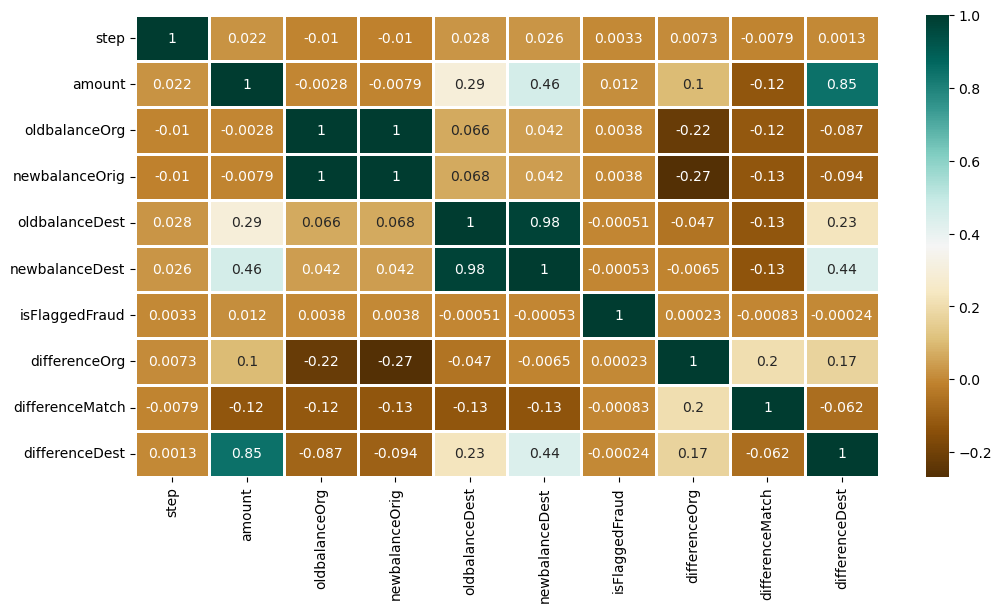

In [42]:
#dropping string columns since they can't be given labels
corr_df = df.drop(['nameOrig', 'nameDest', 'type', 'isFraud'], axis=1)

plt.figure(figsize=(12,6))
sns.heatmap(corr_df.corr(),
            cmap='BrBG',
            annot=True,
            linewidths=2)
plt.show()

# correlation of string variables (groupby tables)

In [27]:
df.groupby('type')['isFlaggedFraud'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
CASH_IN,1399284,0,0,0,0,0,0,0
CASH_OUT,2237500,0,0,0,0,0,0,0
DEBIT,41432,0,0,0,0,0,0,0
PAYMENT,2151495,0,0,0,0,0,0,0
TRANSFER,532909,0,0,0,0,0,0,1


In [26]:
df.groupby('type')['isFraud'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
CASH_IN,1399284,0,0,0,0,0,0,0
CASH_OUT,2237500,0,0,0,0,0,0,1
DEBIT,41432,0,0,0,0,0,0,0
PAYMENT,2151495,0,0,0,0,0,0,0
TRANSFER,532909,0,0,0,0,0,0,1


# ML model training

The dataset contains simulated transaction types. In this analysis, transaction types are included as categorical features using one-hot encoding, allowing the models to learn patterns associated with different types. Future work could explore alternative encodings or feature engineering to improve interpretability and model performance.

In [35]:
#pip install xgboost

In [48]:
#drop id column
df = data.drop(['nameOrig', 'nameDest'], axis=1)

#encode the transaction types (one hot encoding)
df = pd.get_dummies(df, columns=['type'], drop_first=True)

#define x and y
X = df.drop(['isFraud'], axis=1)
y = df['isFraud']

#split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

#training models
models = [LogisticRegression(), XGBClassifier(),
          RandomForestClassifier(n_estimators=7,
                                 criterion='entropy', 
                                 random_state=7)]

for i in range(len(models)):
    models[i].fit(X_train, y_train)
    print(f'{models[i]} : ')
    
    train_preds = models[i].predict_proba(X_train)[:, 1]
    y_preds = models[i].predict_proba(X_test)[:, 1]
    
    print('Training Accuracy : ', ras(y_train, train_preds))
    print('Validation Accuracy : ', ras(y_test, y_preds))
    
    print("Train AUC:", ras(y_train, train_preds))
    print("Test AUC :", ras(y_test, y_preds))
    print()
    
    # Check feature importances
    if isinstance(models[i], (RandomForestClassifier, XGBClassifier)):
        print(f"Feature importances for {models[i]}:")
        print(models[i].feature_importances_)


LogisticRegression() : 
Training Accuracy :  0.8742661778298872
Validation Accuracy :  0.8801601768242175
Train AUC: 0.8742661778298872
Test AUC : 0.8801601768242175

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Training Accuracy :  0.9982730039390072
Validation Accuracy :  0.9959

In [47]:
X.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFlaggedFraud', 'type_CASH_OUT', 'type_DEBIT',
       'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

## Logistic Regression

Training Accuracy :  0.8743
Validation Accuracy :  0.8802


Training Accuracy ~ 87.4% → On the data the model learned from, it predicts correctly about 87% of the time.

Validation Accuracy ~ 88.0% → On unseen data (your test set), it predicts correctly about 88% of the time.

## XGBoost
Training Accuracy :  0.9983
Validation Accuracy :  0.9959


Training Accuracy ~ 99.8% → Almost perfect fit to training data.

Validation Accuracy ~ 99.6% → Also very high on test set.

## Random Forest
Training Accuracy :  0.999999
Validation Accuracy :  0.9579


Training Accuracy ~ 100% → Perfect fit to training data.

Validation Accuracy ~ 95.8% → Slightly lower than XGBoost.

## AUC (for random forest)
Train AUC: 0.999999
Test AUC : 0.9579037


AUC (Area Under ROC Curve) measures model’s ability to distinguish between classes (fraud vs non-fraud).

1.0 = perfect, 0.5 = random guessing.

## Feature Importance (Random Forest Classifier)

Both Random Forest and XGBoost provide feature importance arrays, where each number corresponds to a feature and indicates its relative influence on the model’s decisions. Larger values mean the feature contributed more. The only minor difference is that Random Forest importance values sum roughly to 1, while XGBoost values are relative scores not normalized to 1.

To understand which features the model relied on most to predict fraud, I used the feature_importances_ attribute of the XGBoost and Random Forest model. This measures the relative contribution of each feature to the decision-making in the trees.

Values are fractions summing to 1; larger values indicate more important features.

In this dataset, numeric features like oldbalanceOrg, newbalanceDest, and amount had the highest importance, meaning the model relied on them most.

Transaction types (type_CASH_OUT, type_DEBIT, etc.) had lower importance, indicating they contributed less to predictions.

Note: This table reflects the Random Forest model only; feature importance is not directly comparable to other models like Logistic Regression or XGBoost.


| Feature Importance Value | Meaning                                                                              |
| ------------------------ | ------------------------------------------------------------------------------------ |
| Large (e.g., 0.2–0.3)    | Model heavily relied on this feature for splitting decisions → important predictor   |
| Small (e.g., 0.0001)     | Model almost ignored this feature → weak predictor                                   |
| 0                        | Feature had no influence at all in the trees (possible if too few trees or not used) |
